<a href="https://colab.research.google.com/github/MuhammadUsama100/Fit_Line_Using_Regression/blob/master/Fit_Line_Using_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import tensorflow as tf 

In [0]:
x_data = np.linspace(0.0 , 10.0, 1000000)

In [0]:
noise = np.random.randn(len(x_data))

In [7]:
noise


array([ 0.70104132, -0.53696675, -0.24516659, ...,  0.83654225,
       -0.24927353, -1.50635681])

In [0]:
# y =  mx + b
b = 5

In [0]:
y_true = (0.5 * x_data) + 5 +noise

In [0]:
x_df = pd.DataFrame(data = x_data , columns=["X Data"])
y_df = pd.DataFrame(data= y_true , columns=["Y"])


In [11]:
y_df.head()

,Y
0,5.701041
1,4.463038
2,4.754843
3,5.857011
4,4.561351


In [0]:
my_data = pd.concat([x_df , y_df] , axis= 1)

In [13]:
my_data.head()

,X Data,Y
0,0.00000,5.701041
1,0.00001,4.463038
2,0.00002,4.754843
3,0.00003,5.857011
4,0.00004,4.561351


In [14]:
my_data.sample(n=250)

,X Data,Y
425117,4.251174,9.139799
149783,1.497831,6.327146
330022,3.300223,7.183150
50813,0.508131,5.622444
365240,3.652404,7.969925
...,...,...
954501,9.545020,9.235490
227618,2.276182,6.371793
588792,5.887926,7.538067
720420,7.204207,9.815766


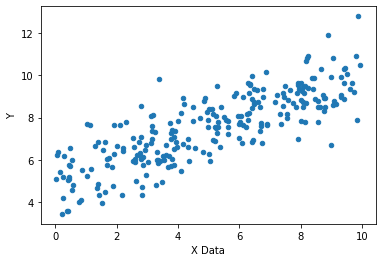

In [15]:
my_data.sample(n=250).plot(kind= "scatter" , x = "X Data" , y = "Y")

In [0]:
batch_size = 8 

In [17]:
np.random.randn(2)

array([ 1.68729432, -1.41454658])

In [0]:
m = tf.Variable(0.86)

In [0]:
b = tf.Variable(0.45) 

In [0]:
xplace  = tf.placeholder(tf.float32 , [batch_size])

In [0]:
yplace =  tf.placeholder(tf.float32 , [batch_size])

In [0]:
ymodel =  m*xplace + b 

In [0]:
error =  tf.reduce_sum(tf.square(yplace - ymodel))

In [0]:
optimizr = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train  = optimizr.minimize(error)

In [0]:
init = tf.global_variables_initializer()

In [0]:
with tf.Session() as sess : 
  sess.run(init)
  batches = 10000 # I have run through 10000 of dataset 1000000 for 100000 is is over fitting  
  for i  in range (batches) : 
    rand_ind  = np.random.randint(len(x_data) , size=batch_size)
    feed = {xplace:x_data[rand_ind],yplace:y_true[rand_ind]}
    sess.run(train, feed_dict = feed)
  model_m , model_b = sess.run([m ,b])


In [30]:
model_m

0.57024187

In [31]:
model_b

4.987331

In [0]:
y_hat = x_data*model_m + model_b

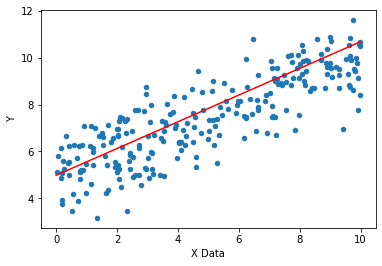

In [33]:
my_data.sample(250).plot(kind = "scatter" ,  x= "X Data" , y = "Y")
plt.plot(x_data ,  y_hat ,"r")